In [1]:
## Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

## Import API key
from api_keys import api_key

## Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Output File (CSV)
output_data_file = "output_data/cities.csv"

## Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
## List for holding lat_lngs and cities
lat_lngs = []
cities = []

## Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)

## Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
## Print the city count to confirm sufficient count
len(cities)

628

In [3]:
## create DF, starting with cities
city_df = pd.DataFrame({"City": cities})
## Test 
city_df.head()

,City
0,atar
1,tuktoyaktuk
2,cidreira
3,chuy
4,saleaula


In [4]:
## Add the other columns to be filled in later

city_df['Country'] = ""
city_df['Date'] = ""
city_df['Latitude'] = ""
city_df['Longitude'] = ""
city_df['Max Temp'] = ""
city_df['Humidity in %'] = ""
city_df['Clouds in %'] = ""
city_df['Wind Speed'] = ""

## Check Added Columns
city_df.head()


,City,Country,Date,Latitude,Longitude,Max Temp,Humidity in %,Clouds in %,Wind Speed
0,atar,,,,,,,,
1,tuktoyaktuk,,,,,,,,
2,cidreira,,,,,,,,
3,chuy,,,,,,,,
4,saleaula,,,,,,,,


In [5]:
## Build For Loop

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city = city_df.iloc[0]['City']
city
query_url = f"{base_url}appid={api_key}&units={units}&q="

for index, row in city_df.iterrows():
    ## Set column to iterate down to the "City" column
    city = row["City"]
    ## Request to get data from API for the city
    data_response = requests.get(query_url + city).json()
   
    ## Try and except structure to skip city when data is missing. Will give KeyError
    try:
        print("Beginning Data Retrieval")
        print(f"Processing: {city}")
        
        city_df.loc[index, 'Country'] = data_response["sys"]["country"]
        city_df.loc[index, 'Date'] = data_response["dt"]
        city_df.loc[index, 'Latitude'] = data_response["coord"]["lat"]
        city_df.loc[index, 'Longitude'] = data_response["coord"]["lon"]
        city_df.loc[index, 'Max Temp'] = data_response["main"]["temp_max"]
        city_df.loc[index, 'Humidity in %'] = data_response["main"]["humidity"]
        city_df.loc[index, 'Clouds in %'] = data_response["clouds"]["all"]
        city_df.loc[index, 'Wind Speed'] = data_response["wind"]["speed"]
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    print("------------")

Beginning Data Retrieval
Processing: atar
------------
Beginning Data Retrieval
Processing: tuktoyaktuk
------------
Beginning Data Retrieval
Processing: cidreira
------------
Beginning Data Retrieval
Processing: chuy
------------
Beginning Data Retrieval
Processing: saleaula
Missing field/result... skipping.
------------
Beginning Data Retrieval
Processing: bambous virieux
------------
Beginning Data Retrieval
Processing: shetpe
------------
Beginning Data Retrieval
Processing: barrow
------------
Beginning Data Retrieval
Processing: olafsvik
Missing field/result... skipping.
------------
Beginning Data Retrieval
Processing: erzin
------------
Beginning Data Retrieval
Processing: honningsvag
------------
Beginning Data Retrieval
Processing: tiksi
------------
Beginning Data Retrieval
Processing: atuona
------------
Beginning Data Retrieval
Processing: cape town
------------
Beginning Data Retrieval
Processing: aklavik
------------
Beginning Data Retrieval
Processing: taolanaro
Missing

Beginning Data Retrieval
Processing: atambua
------------
Beginning Data Retrieval
Processing: port lincoln
------------
Beginning Data Retrieval
Processing: le vauclin
------------
Beginning Data Retrieval
Processing: yelan-kolenovskiy
------------
Beginning Data Retrieval
Processing: meulaboh
------------
Beginning Data Retrieval
Processing: butaritari
------------
Beginning Data Retrieval
Processing: ayagoz
------------
Beginning Data Retrieval
Processing: santa maria
------------
Beginning Data Retrieval
Processing: miranda
------------
Beginning Data Retrieval
Processing: alice springs
------------
Beginning Data Retrieval
Processing: havoysund
------------
Beginning Data Retrieval
Processing: george town
------------
Beginning Data Retrieval
Processing: pozo colorado
------------
Beginning Data Retrieval
Processing: kampot
------------
Beginning Data Retrieval
Processing: kaabong
------------
Beginning Data Retrieval
Processing: khash
------------
Beginning Data Retrieval
Process

Beginning Data Retrieval
Processing: los llanos de aridane
------------
Beginning Data Retrieval
Processing: kapaa
------------
Beginning Data Retrieval
Processing: mayskiy
------------
Beginning Data Retrieval
Processing: kenai
------------
Beginning Data Retrieval
Processing: lavrentiya
------------
Beginning Data Retrieval
Processing: half moon bay
------------
Beginning Data Retrieval
Processing: biltine
------------
Beginning Data Retrieval
Processing: nizhneyansk
Missing field/result... skipping.
------------
Beginning Data Retrieval
Processing: xingyi
------------
Beginning Data Retrieval
Processing: kodiak
------------
Beginning Data Retrieval
Processing: muli
------------
Beginning Data Retrieval
Processing: san jeronimo
------------
Beginning Data Retrieval
Processing: vardo
------------
Beginning Data Retrieval
Processing: moba
------------
Beginning Data Retrieval
Processing: bakchar
------------
Beginning Data Retrieval
Processing: port elizabeth
------------
Beginning Dat

Beginning Data Retrieval
Processing: ambon
------------
Beginning Data Retrieval
Processing: lagoa
------------
Beginning Data Retrieval
Processing: saint george
------------
Beginning Data Retrieval
Processing: palabuhanratu
Missing field/result... skipping.
------------
Beginning Data Retrieval
Processing: cockburn harbour
Missing field/result... skipping.
------------
Beginning Data Retrieval
Processing: san patricio
------------
Beginning Data Retrieval
Processing: leninskoye
------------
Beginning Data Retrieval
Processing: staraya kulatka
------------
Beginning Data Retrieval
Processing: panjwin
Missing field/result... skipping.
------------
Beginning Data Retrieval
Processing: tignere
------------
Beginning Data Retrieval
Processing: wabana
------------
Beginning Data Retrieval
Processing: chivay
------------
Beginning Data Retrieval
Processing: samarai
------------
Beginning Data Retrieval
Processing: natitingou
------------
Beginning Data Retrieval
Processing: berlevag
-------

Beginning Data Retrieval
Processing: belokurikha
------------
Beginning Data Retrieval
Processing: camacupa
------------
Beginning Data Retrieval
Processing: vestmannaeyjar
------------
Beginning Data Retrieval
Processing: sao paulo de olivenca
------------
Beginning Data Retrieval
Processing: yanam
------------
Beginning Data Retrieval
Processing: daru
------------
Beginning Data Retrieval
Processing: tucuma
Missing field/result... skipping.
------------
Beginning Data Retrieval
Processing: waingapu
------------
Beginning Data Retrieval
Processing: dhanwar
------------
Beginning Data Retrieval
Processing: vaitape
------------
Beginning Data Retrieval
Processing: vagur
------------
Beginning Data Retrieval
Processing: kununurra
------------
Beginning Data Retrieval
Processing: whyalla
------------
Beginning Data Retrieval
Processing: husavik
------------
Beginning Data Retrieval
Processing: piacabucu
------------
Beginning Data Retrieval
Processing: pouebo
------------
Beginning Data R

In [6]:
## Print Preview of DF
city_df.head()

,City,Country,Date,Latitude,Longitude,Max Temp,Humidity in %,Clouds in %,Wind Speed
0,atar,MR,1559695431,20.52,-13.05,99.95,12,36,11.48
1,tuktoyaktuk,CA,1559695431,69.44,-133.03,46.4,65,40,14.99
2,cidreira,BR,1559695431,-30.17,-50.22,60.53,72,1,5.53
3,chuy,UY,1559695432,-33.69,-53.46,59.27,61,0,8.43
4,saleaula,,,,,,,,


In [7]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 9 columns):
City             628 non-null object
Country          628 non-null object
Date             628 non-null object
Latitude         628 non-null object
Longitude        628 non-null object
Max Temp         628 non-null object
Humidity in %    628 non-null object
Clouds in %      628 non-null object
Wind Speed       628 non-null object
dtypes: object(9)
memory usage: 44.2+ KB


In [8]:
## Clean the data. There are cities without any info

#clean_df = city_df.dropna(axis=0, how='any')
city_df = city_df[city_df.Country != ""]
city_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 627
Data columns (total 9 columns):
City             556 non-null object
Country          556 non-null object
Date             556 non-null object
Latitude         556 non-null object
Longitude        556 non-null object
Max Temp         556 non-null object
Humidity in %    556 non-null object
Clouds in %      556 non-null object
Wind Speed       556 non-null object
dtypes: object(9)
memory usage: 43.4+ KB


In [9]:
## Save DF to CSV

city_df.to_csv(output_data_file)

In [10]:
## Build list for X(Latitude) and Y(Temp) axis

x_lat = []
y_temp = []
for lat in city_df['Latitude']:
    x_lat.append(lat)

for temp in city_df['Max Temp']:
    y_temp.append(temp)


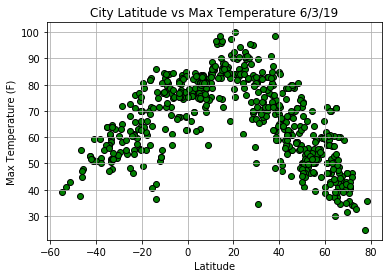

In [19]:
## Scatter plot for Latitude vs Temperature

plt.scatter(x_lat, y_temp, marker='o', edgecolor="black", color="green")
plt.grid()

plt.title("City Latitude vs Max Temperature 6/3/19")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

## Save figure 
plt.savefig("images/Lat_vs_Temp.png")


In [12]:
## Build list for Y(humidity) axis
y_humidity = []

for row in city_df['Humidity in %']:
    y_humidity.append(row)

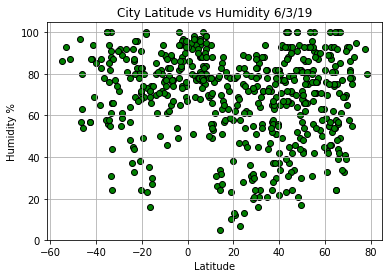

In [20]:
## Scatter plot for Latitude vs Humidity

plt.scatter(x_lat, y_humidity, marker='o', edgecolor="black", color="green")
plt.grid()
plt.title("City Latitude vs Humidity 6/3/19")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

## Save figure
plt.savefig("images/Lat_vs_Humidity.png")


In [14]:
## Build list for Y(Cloudiness) axis
y_clouds = []

for row in city_df['Clouds in %']:
    y_clouds.append(row)

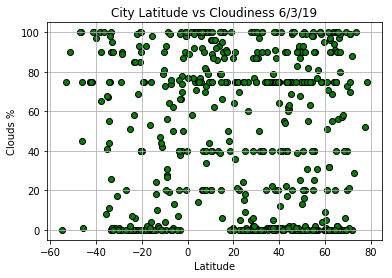

In [21]:
## Scatter plot for Latitude vs Cloudiness

plt.scatter(x_lat, y_clouds, marker='o', edgecolor="black", color="green")
plt.grid()
plt.title("City Latitude vs Cloudiness 6/3/19")
plt.xlabel("Latitude")
plt.ylabel("Clouds %")

## Save figure
plt.savefig("images/Lat_vs_Cloudiness.png")


In [16]:
## Build list for Y(Wind Speed) axis
y_wind = []

for row in city_df['Wind Speed']:
    y_wind.append(row)

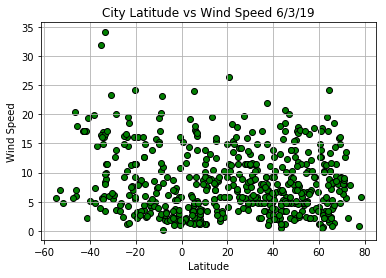

In [22]:
## Scatter plot for Latitude vs Wind SPeed

plt.scatter(x_lat, y_wind, marker='o', edgecolor="black", color="green")
plt.grid()
plt.title("City Latitude vs Wind Speed 6/3/19")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

## Save figure
plt.savefig("images/Lat_vs_Wind_Speed.png")
